# Plotting pace data

source: Fitbit

In [1]:
import tcxparser 
import pandas as pd
import xmltodict as xml
import collections
from pint import UnitRegistry
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [23]:
# Set up working directory
if os.getcwd() == '/Users/aishaellahi85/PycharmProjects/bq/tcx_files':
    pass
else:
    os.chdir('tcx_files/')

In [68]:
# tcxparser tests 

tcx_file = "activity_2029795766.tcx"
tcx_data = tcxparser.TCXParser(tcx_file)
print(tcx_data.activity_type)
print(tcx_data.completed_at)
print(tcx_data.duration)
print(tcx_data.distance)

# TCX parser doesn't return the distance?! 
# I don't get it...

running
2017-10-01T17:46:49.000Z
4987.0
15309.8496094


In [87]:
tcx_data.duration

4987.0

In [95]:
# csv
splits_csv = pd.read_csv("activity_2015763725.csv")
splits_csv

,Split,Time,Moving Time,Distance,Elevation Gain,Elev Loss,Avg Pace,Avg Moving Paces,Best Pace,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg HR,Max HR,Avg Temperature,Calories
0,1,00:15:11.950,00:14:58.00,1.52,275,--,0:09:59,0:09:50,0:07:54,184.562500,194.0,87.256996,--,--,--,116
1,2,00:03:17.455,00:03:12.00,0.50,60,--,0:06:37,0:06:26,0:05:52,198.171875,202.0,122.667942,--,--,--,44
2,3,00:01:20.00,00:01:15.00,0.12,--,--,0:10:45,0:10:04,0:06:50,159.125000,196.0,94.076986,--,--,--,10
3,4,00:03:24.869,00:03:20.00,0.50,--,24,0:06:52,0:06:42,0:06:03,197.671875,206.0,118.527767,--,--,--,45
4,5,00:01:20.00,00:01:15.00,0.11,13,--,0:12:30,0:11:43,0:06:39,155.375000,196.0,82.884959,--,--,--,7
5,6,00:03:25.595,00:03:22.00,0.50,--,--,0:06:53,0:06:46,0:06:04,201.250000,207.0,116.009298,--,--,--,44
6,7,00:01:20.00,00:01:14.00,0.11,--,--,0:12:30,0:11:34,0:06:56,148.375000,199.0,86.714408,--,--,--,8
7,8,00:03:24.522,00:03:21.00,0.50,--,--,0:06:51,0:06:44,0:05:43,201.375000,206.0,116.545537,--,--,--,45
8,9,00:01:20.00,00:01:05.00,0.11,--,--,0:11:59,0:09:44,0:06:54,154.625000,202.0,86.798705,--,--,--,8
9,10,00:03:33.363,00:03:27.00,0.50,--,--,0:07:09,0:06:56,0:05:38,200.296875,204.0,112.317633,--,--,--,45


In [72]:
with open(tcx_file) as tcx:
        try:
            tcx_obj = xml.parse(tcx.read())
            print(tcx_obj[u'TrainingCenterDatabase']['Activities']['Activity'][u'Lap'].keys())
        except:
            print 'what?'

what?


In [60]:
print(tcx_data.time_values()[0:10])
print(len(tcx_data.altitude_points()))

['2017-09-08T07:25:25.000-07:00', '2017-09-08T07:25:26.000-07:00', '2017-09-08T07:25:27.000-07:00', '2017-09-08T07:25:28.000-07:00', '2017-09-08T07:25:29.000-07:00', '2017-09-08T07:25:30.000-07:00', '2017-09-08T07:25:31.000-07:00', '2017-09-08T07:25:32.000-07:00', '2017-09-08T07:25:33.000-07:00', '2017-09-08T07:25:34.000-07:00']
3853


In [31]:
from pint import UnitRegistry
import datetime
ureg = UnitRegistry()

def run_metrics(tcx_file):
    
    """Parses tcx_file. 
    Returns: start time of run and dictionary of lap, distance, and time."""
    
    with open(tcx_file) as tcx:
        try:
            tcx_obj = xml.parse(tcx.read())
            total_dist_m = 0
            total_time_sec = 0
            start_time = str(tcx_obj['TrainingCenterDatabase']['Activities']['Activity']['Lap'][0]['@StartTime'])
            lap_dict = collections.OrderedDict()
            laps = tcx_obj['TrainingCenterDatabase']['Activities']['Activity']['Lap']
            if laps:
                for n, lap in enumerate(laps):
                    lap_dict[n] = float(total_dist_m), float(total_time_sec)
                    total_dist_m+=float(lap['DistanceMeters'])
                    total_time_sec+=float(lap['TotalTimeSeconds'])
                return start_time, total_dist_m, total_time_sec
            else:
                return None
        except:
            print "Error! Unable to read file: ", tcx_file   

def track_lap_time(distance_in_meters, lap_type='speed', speed_1600m=(417, 427), tempo_1600m=(447, 457)):
    
    '''Returns time to finish distance_in_meters in minutes:seconds units.
    Default lap_type is speed. Specify "tempo" to return target tempo speed.'''
    
    distance_multiplier = float(distance_in_meters)/float(1600)
    
    def calc_target_time(seconds, dist_multiplier):
        target_time = (seconds * dist_multiplier)
        minutes = str(datetime.timedelta(seconds=target_time))
        return minutes
    
    if lap_type == 'speed':
        target = calc_target_time(417, distance_multiplier)
    elif lap_type == 'tempo':
        target = calc_target_time(447, distance_multiplier)
    return target

def sum_tcx(list_of_tcx_files):
    
    """Sums the total distance and total time contained with an input
    list of tcx_files. Returns start time of first tcx file."""
    total_dist = 0
    total_time = 0
    for ind, tcx in enumerate(list_of_tcx_files):
        if ind==0:
            start_time, dist, time = run_metrics(tcx)
        else:
            drop_start, dist, time = run_metrics(tcx)
        total_dist+=dist
        total_time+=time
    return start_time, total_dist, total_time

# Test function
start, dist_m, time_s = run_metrics('9785157455.tcx')

def return_laps(tcx_file):
    
    """Parses tcx_file and returns lap-by-lap metrics. 
    Returns: start time of run and dictionary of lap, distance, and time."""
    
    with open(tcx_file) as tcx:
        try:
            tcx_obj = xml.parse(tcx.read())
            total_dist_m = 0
            total_time_sec = 0
            start_time = str(tcx_obj['TrainingCenterDatabase']['Activities']['Activity']['Lap'][0]['@StartTime'])
            lap_dict = collections.OrderedDict()
            laps = tcx_obj['TrainingCenterDatabase']['Activities']['Activity']['Lap']
            if laps:
                for n, lap in enumerate(laps):
                    lap_dict[n] = float(total_dist_m), float(total_time_sec)
                    total_dist_m+=float(lap['DistanceMeters'])
                    total_time_sec+=float(lap['TotalTimeSeconds'])
                return lap_dict
            else:
                return None
        except:
            print "Error! Unable to read file: ", tcx_file   

In [32]:
import numpy as np
print 'TIMES TO HIT'
print
distances = np.arange(400, 1800, 400)
lap_types = ['speed', 'tempo']
for lap_type in lap_types:
    print lap_type
    for dist in distances:
        target = track_lap_time(dist, lap_type=lap_type)
        print '%s: %s' %(tuple(map(str, [dist, target])))
    print

TIMES TO HIT

speed
400: 0:01:44.250000
800: 0:03:28.500000
1200: 0:05:12.750000
1600: 0:06:57

tempo
400: 0:01:51.750000
800: 0:03:43.500000
1200: 0:05:35.250000
1600: 0:07:27



In [33]:
# Parse files and create a df!

run_data_list = []
import os
for tcx_file in os.listdir('.'):
    tup = run_metrics(tcx_file)
    if tup:
        run_data_list.append(tup)

Error! Unable to read file:  .DS_Store
Error! Unable to read file:  8437947695.tcx
Error! Unable to read file:  9022871344.tcx
Error! Unable to read file:  9907841004.tcx
Error! Unable to read file:  9907841005.tcx
Error! Unable to read file:  9908812008.tcx
Error! Unable to read file:  pace.png


In [34]:
run_data = pd.DataFrame(run_data_list, columns = ['start', 'distance (m)', 'time (s)'])
run_data['start'] = pd.to_datetime(run_data['start'])

In [35]:
run_data.shape

(96, 3)

In [36]:
run_data.head()

,start,distance (m),time (s)
0,2016-12-31 15:12:00,26600.0,8691.0
1,2017-01-14 15:28:57,29190.0,9552.0
2,2017-01-17 12:59:23,11530.0,3901.0
3,2017-01-19 00:59:18,8170.0,2526.0
4,2017-01-19 19:16:12,10700.0,3262.0


In [37]:
from pint import UnitRegistry
ureg = UnitRegistry()

In [38]:
min_per_mi_list = []

for n, row in run_data.iterrows():
    dist = (row['distance (m)']) * ureg.meter
    miles = dist.to(ureg.mile)
    
    secs = (row['time (s)']) * ureg.seconds
    minutes = secs.to(ureg.minute)
    
    min_per_mile = (minutes/miles).magnitude
    tup = miles.magnitude, minutes.magnitude, min_per_mile
    min_per_mi_list.append(tup)

In [39]:
pace_df = pd.DataFrame(min_per_mi_list, columns = ['miles', 'minutes', 'min_per_mile'])
pace_df.head()

,miles,minutes,min_per_mile
0,16.528474,144.850000,8.763665
1,18.137825,159.200000,8.777238
2,7.164410,65.016667,9.074951
3,5.076603,42.100000,8.292948
4,6.648672,54.366667,8.177072


In [40]:
# Add pace and create a 'date' only column
run_data[pace_df.columns.tolist()] = pace_df[pace_df.columns.tolist()]
datetime_index_df = pd.DatetimeIndex(run_data['start']).normalize()
run_data['date'] = datetime_index_df.strftime('%D')

# Drop outliers that are likely tracking errors
ind_to_drop = run_data.loc[run_data['min_per_mile'] < 6.5].index.tolist()
run_data.drop(ind_to_drop, inplace=True)
run_data.head()

,start,distance (m),time (s),miles,minutes,min_per_mile,date
0,2016-12-31 15:12:00,26600.0,8691.0,16.528474,144.850000,8.763665,12/31/16
1,2017-01-14 15:28:57,29190.0,9552.0,18.137825,159.200000,8.777238,01/14/17
2,2017-01-17 12:59:23,11530.0,3901.0,7.164410,65.016667,9.074951,01/17/17
3,2017-01-19 00:59:18,8170.0,2526.0,5.076603,42.100000,8.292948,01/19/17
4,2017-01-19 19:16:12,10700.0,3262.0,6.648672,54.366667,8.177072,01/19/17


In [41]:
mean_pace = run_data['min_per_mile'].mean()

In [43]:
run_data.tail()

,start,distance (m),time (s),miles,minutes,min_per_mile,date
91,2017-09-06 13:58:14,8630.0,2693.0,5.362433,44.883333,8.369956,09/06/17
92,2017-09-08 14:25:25,11150.0,3573.0,6.928289,59.550000,8.595196,09/08/17
93,2017-09-11 12:17:02,6780.0,2307.0,4.212897,38.450000,9.126737,09/11/17
94,2017-09-13 12:26:59,11050.0,3391.0,6.866152,56.516667,8.231200,09/13/17
95,2017-09-16 18:14:51,5940.0,1918.0,3.690945,31.966667,8.660836,09/16/17


/Users/aishaellahi85/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


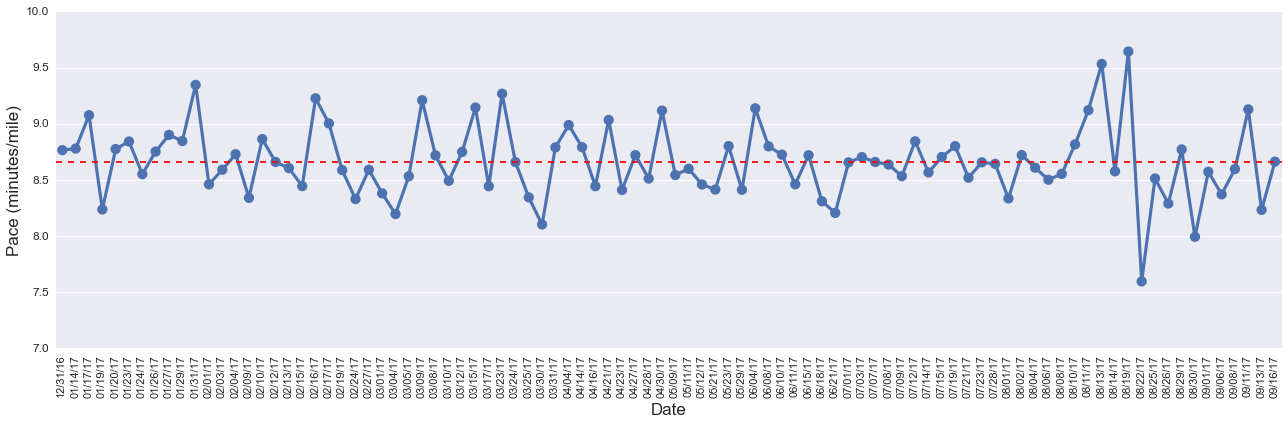

In [44]:
# Plot!
%matplotlib inline 
plt.rcParams['figure.figsize'] = (18, 6)
# plot this shameful data
sns.pointplot(x = run_data['date'], y = run_data['min_per_mile'], ci=None)
plt.axhline(y=mean_pace, color='r', linestyle='--')
plt.xticks(size = 11, rotation='vertical')
plt.ylim(7, 10)
plt.yticks(size=12)
plt.ylabel("Pace (minutes/mile)", size=17)
plt.xlabel("Date", size=17)
plt.tight_layout()
plt.savefig("pace.png")

In [45]:
# Weekly mileage
weekly = run_data[['start', 'miles', 'min_per_mile']].groupby(pd.Grouper(key='start', freq='W')).agg({'miles':[sum, 'mean', 'count'],  
                                                                                                    'min_per_mile': ['mean', 'min', 'max']})
weekly

miles                  min_per_mile                    
                  sum       mean count         mean       min       max
start                                                                  
2017-01-01  16.528474  16.528474     1     8.763665  8.763665  8.763665
2017-01-08        NaN        NaN     0          NaN       NaN       NaN
2017-01-15  18.137825  18.137825     1     8.777238  8.777238  8.777238
2017-01-22  24.301827   6.075457     4     8.579613  8.177072  9.074951
2017-01-29  44.800863   8.960173     5     8.777227  8.549640  8.899729
2017-02-05  39.873389   7.974678     5     8.741906  8.458751  9.344962
2017-02-12  26.060308   8.686769     3     8.619713  8.338627  8.862217
2017-02-19  40.743309   8.148662     5     8.771862  8.443177  9.225136
2017-02-26   7.114700   7.114700     1     8.327828  8.327828  8.327828
2017-03-05  41.358467  10.339617     4     8.423212  8.194206  8.589248
2017-03-12  33.696960   8.424240     4     8.790852  8.490305  9.208546
2017-03-19  14.086485   7.043242     2     8.792542  8.441851  9.143233
2017-03-26  29.384644   9.794881     3     8.755371  8.342619  9.266581
2017-04-02  12.303150   6.151575     2     8.444797  8.101314  8.788280
2017-04-09   4.890191   4.890191     1     8.987379  8.987379  8.987379
2017-04-16  26.035453  13.017726     2     8.616095  8.441823  8.790367
2017-04-23  17.591018   8.795509     2     8.720462  8.408300  9.032624
2017-04-30  36.132735  12.044245     3     8.781811  8.510364  9.116217
2017-05-07        NaN        NaN     0          NaN       NaN       NaN
2017-05-14  14.154836   4.718279     3     8.532491  8.457921  8.597650
2017-05-21   9.426201   9.426201     1     8.412721  8.412721  8.412721
2017-05-28   5.579913   5.579913     1     8.799420  8.799420  8.799420
2017-06-04  17.920345   8.960173     2     8.773466  8.410750  9.136181
2017-06-11  22.120814   7.373605     3     8.660039  8.459114  8.797456
2017-06-18  15.944385   7.972192     2     8.513400  8.308312  8.718488
2017-06-25   5.387288   5.387288     1     8.204499  8.204499  8.204499
2017-07-02   5.318937   5.318937     1     8.654611  8.654611  8.654611
2017-07-09  28.073550   7.018388     4     8.631716  8.531824  8.701459
2017-07-16  24.544162   8.181387     3     8.703148  8.564960  8.842240
2017-07-23  24.600086   8.200029     3     8.657367  8.517619  8.799587
2017-07-30   5.356220   5.356220     1     8.641045  8.641045  8.641045
2017-08-06  28.645212   7.161303     4     8.539859  8.333284  8.719616
2017-08-13  24.743001   6.185750     4     9.004616  8.552173  9.531815
2017-08-20  10.289907   5.144953     2     9.108516  8.574742  9.642289
2017-08-27  24.308041   6.077010     4     8.226035  7.593949  8.838362
2017-09-03  15.615058   5.205019     3     8.444023  7.991302  8.769931
2017-09-10  12.290722   6.145361     2     8.482576  8.369956  8.595196
2017-09-17  14.769993   4.923331     3     8.672924  8.231200  9.126737

In [46]:
mean_pace

8.654645916204291

In [47]:
run_data[['min_per_mile', 'distance (m)', 'miles']].describe()

,min_per_mile,distance (m),miles
count,95.000000,95.000000,95.000000
mean,8.654646,12572.000000,7.811879
std,0.324092,7159.008995,4.448402
min,7.593949,4680.000000,2.908017
25%,8.458336,8550.000000,5.312724
50%,8.641045,10910.000000,6.779160
75%,8.798438,11535.000000,7.167517
max,9.642289,42610.000000,26.476627


In [48]:
run_data.to_csv("runs.csv", index=False)

### Parsing laps in 9-13-2017 run

In [49]:
tcx_9873601427 = return_laps("9873601427.tcx")
tcx_9873601427

OrderedDict([(0, (0.0, 0.0)),
             (1, (1610.0, 537.0)),
             (2, (3220.0, 1049.0)),
             (3, (4830.0, 1491.0)),
             (4, (6440.0, 1961.0)),
             (5, (8050.0, 2450.0)),
             (6, (9660.0, 2961.0))])

# 2017-10-13 Data Logging & Analysis

In [111]:
os.getcwd()
os.chdir('20171013/')

In [118]:
!ls

20170918_9966693219.tcx       20170928_track_2015763725.tcx
20170920_10003739086.tcx      20171001_long_2029795766.tcx
20170922_10033209411.tcx      20171002_tempo_2035750889.tcx
20170923_10050570875.tcx      20171004_tempo_2041808880.tcx
20170925_10098354904.tcx      20190927_tempo_2017695392.tcx


In [114]:
run_data_list = []
for tcx_file in os.listdir('.'):
    tup = run_metrics(tcx_file)
    if tup:
        start, dist, time = tup
        dist_m = dist * ureg.meter
        miles = dist_m.to(ureg.mile)
        secs = time * ureg.seconds
        minutes = secs.to(ureg.minute)
        min_per_mile = (minutes/miles).magnitude
        metrics = (start, dist, time, miles.magnitude, minutes.magnitude, min_per_mile)
        run_data_list.append(metrics)

run_data = pd.DataFrame(run_data_list, columns = ['start', 'distance (m)', 'time (s)', 'miles', 'minutes', 'min_per_mile'])
run_data['start'] = pd.to_datetime(run_data['start'])

In [115]:
run_data

,start,distance (m),time (s),miles,minutes,min_per_mile
0,2017-09-19 00:46:17,6840.0,2070.0,4.250179,34.500000,8.117305
1,2017-09-21 01:28:00,11260.0,3454.0,6.996640,57.566667,8.227759
2,2017-09-22 13:53:44,10300.0,3123.0,6.400123,52.050000,8.132656
3,2017-09-23 14:40:08,16170.0,5013.0,10.047572,83.550000,8.315442
4,2017-09-26 00:21:01,7080.0,2123.0,4.399308,35.383333,8.042932


In [119]:
!ls *.csv

Activities.csv


In [126]:
activities = pd.read_csv("Activities.csv")
activities.columns.tolist()

['Activity Type',
 'Date',
 'Favorite',
 'Title',
 'Distance',
 'Calories',
 'Time',
 'Avg HR',
 'Max HR',
 'Aerobic TE',
 'Avg Cadence',
 'Max Cadence',
 'Avg Pace',
 'Best Pace',
 'Elev Gain',
 'Elev Loss',
 'Avg Stride Length',
 'Avg Vertical Ratio',
 'Avg Vertical Oscillation',
 'Avg Ground Contact Time',
 'Avg GCT Balance',
 'Avg Cadence.1',
 'Max Cadence.1',
 'Normalized Power\xc2\xae (NP\xc2\xae)',
 'L/R Balance',
 'Training Stress Score\xc2\xae',
 'Max Avg Power (20 min)',
 'Power',
 'Max Power',
 'Total Strokes',
 'Avg. Swolf',
 'Avg Stroke Rate']

In [128]:
activities[['Activity Type', 'Title', 'Date', 'Distance', 'Time', 'Avg Pace', 'Best Pace', 'Elev Gain', 'Elev Loss', 'Avg Stride Length', 'Avg Cadence.1']].head()

,Activity Type,Title,Date,Distance,Time,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Cadence.1
0,running,track,2017-10-14 08:23:44,7.09,55:40,7:51,6:18,565,566,1.07,--
1,running,tempo,2017-10-11 05:27:56,6.93,1:00:00,8:39,7:23,424,409,0.98,--
2,running,tempo,2017-10-09 18:09:54,4.41,34:28,7:49,7:09,3,3,1.09,--
3,running,long,2017-10-08 07:48:52,10.00,1:22:15,8:13,6:55,224,242,1.01,--
4,running,track,2017-10-06 06:39:19,6.80,56:19,8:17,6:20,675,654,1.03,--


In [129]:
track_splits = pd.read_csv("20171014_track_splits_2107762437.csv")
track_splits

,Split,Time,Moving Time,Distance,Elevation Gain,Elev Loss,Avg Pace,Avg Moving Paces,Best Pace,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg HR,Max HR,Avg Temperature,Calories
0,1,00:08:52.536,00:08:51.00,1.00,127,--,0:08:52,0:08:51,0:07:44,188.171875,197.0,96.359681,--,--,--,92
1,2,00:06:01.511,00:05:57.00,0.64,214,--,0:09:27,0:09:20,0:08:21,187.609375,196.0,90.772943,--,--,--,63
2,3,00:06:47.700,00:06:45.00,1.00,81,83,0:06:47,0:06:45,0:06:18,198.609375,206.0,119.250052,--,--,--,95
3,4,00:00:12.300,00:00:08.00,0.02,--,--,0:12:17,0:07:59,0:07:04,199.000000,199.0,65.841403,--,--,--,2
4,5,00:02:40.00,00:02:37.00,0.30,--,4,0:08:54,0:08:44,0:08:11,182.812500,229.0,98.783591,--,--,--,27
5,6,00:06:53.777,00:06:49.00,1.00,76,71,0:06:53,0:06:49,0:06:27,197.921875,203.0,117.906812,--,--,--,95
6,7,00:00:06.223,00:00:06.00,0.02,--,--,0:06:53,0:06:39,0:06:55,198.421875,199.0,117.591864,--,--,--,1
7,8,00:02:40.00,00:02:32.00,0.32,19,15,0:08:21,0:07:55,0:06:56,188.156250,199.0,102.467365,--,--,--,30
8,9,00:06:43.964,00:06:43.964,1.00,19,30,0:06:44,0:06:44,0:06:24,199.296875,204.0,119.937752,--,--,--,96
9,10,00:00:16.36,00:00:12.00,0.04,--,--,0:07:22,0:05:31,0:06:35,199.000000,199.0,109.615178,--,--,--,3


In [131]:
track_splits['Split'] = track_splits.astype(int)
splits_to_plot = np.arange(2, 11)
to_plot = track_splits.loc[track_splits['Split'].isin(splits_to_plot)]
to_plot.shape

ValueError: invalid literal for long() with base 10: 'Summary'